This notebook is for exploring, visualizing, and analyzing the processed data.

***


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re

def load_data(file_path):
    """
    Load the raw cybercrime dataset.
    """
    return pd.read_csv(file_path)

def clean_data(df):
    """
    Clean and preprocess the dataset.
    """
    # Normalize column names
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

    # Explicitly cast numeric columns before filling
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].astype(float).fillna(0)  # Fill numeric NaNs with 0

    # Fill non-numeric columns
    for col in df.select_dtypes(exclude=[np.number]).columns:
        df[col] = df[col].fillna("Unknown")  # Fill non-numeric NaNs with "Unknown"

    # Extract year from a date column
    if 'attackdate' in df.columns:
        df['year'] = pd.to_datetime(df['attackdate'], errors='coerce').dt.year
    else:
        print("Warning: 'attackdate' column is missing. 'year' column will not be created.")

    # Ensure 'ransomware' is properly processed
    if 'ransomware' in df.columns:
        df['ransomware'] = df['ransomware'].astype('category').cat.codes
    else:
        print("Warning: 'ransomware' column is missing.")

    # Extract IP addresses using regex (optional feature engineering example)
    if 'description' in df.columns:
        df['ip_address'] = df['description'].str.extract(r'(\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b)')
    
    return df

def save_processed_data(df, output_path):
    """
    Save the cleaned dataset to a new CSV file.
    """
    df.to_csv(output_path, index=False)

if __name__ == "__main__":
    # File paths
    input_file = "/repos/PFDA-project/data/cyber_data.csv"
    output_file = "/repos/PFDA-project/data/processed_data.csv"

    # Load, clean, and save the data
    print("Loading data...")
    raw_data = load_data(input_file)
    
    print("Cleaning data...")
    cleaned_data = clean_data(raw_data)
    
    print(f"Saving processed data to {output_file}...")
    save_processed_data(cleaned_data, output_file)
    
    print("Preprocessing complete!")


Loading data...
Cleaning data...
Saving processed data to /repos/PFDA-project/data/processed_data.csv...
Preprocessing complete!


        attackdate                 country     spam  ransomware  \
0  11/10/2022 0:00  Arab Republic of Egypt  0.00090          13   
1  11/10/2022 0:00      Argentine Republic  0.00601           6   
2  11/10/2022 0:00                   Aruba  0.00000           0   
3  11/10/2022 0:00   Bailiwick of Guernsey  0.00000           0   
4  11/10/2022 0:00     Bailiwick of Jersey  0.00003           0   

   local_infection  exploit  malicious_mail  network_attack  on_demand_scan  \
0          0.01353  0.00013         0.00287         0.01007         0.01148   
1          0.00575  0.00035         0.00058         0.00095         0.00482   
2          0.01384  0.00000         0.00092         0.00000         0.00830   
3          0.00546  0.00273         0.00000         0.00091         0.00546   
4          0.00774  0.00101         0.00067         0.00000         0.00707   

   web_threat  rank_spam  rank_ransomware  rank_local_infection  rank_exploit  \
0     0.01708       68.0             47.0

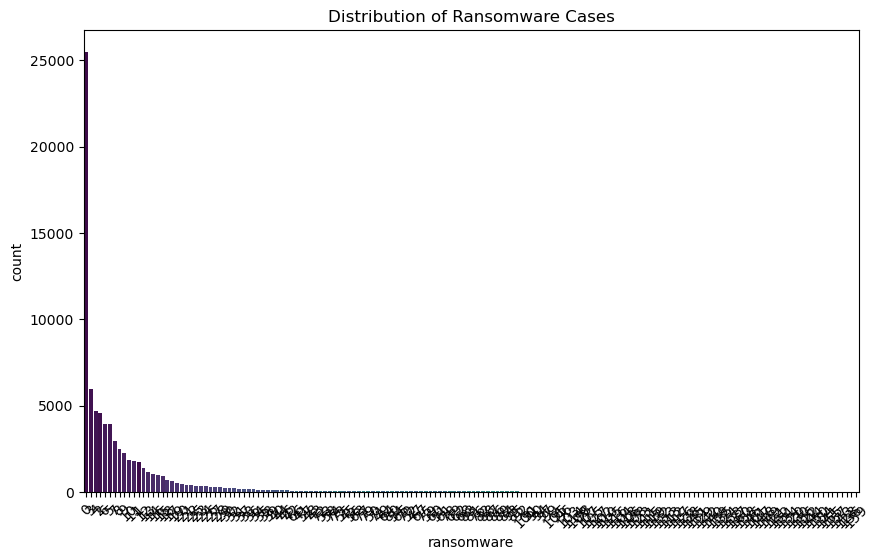

Epoch 1/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3252 - loss: 4.7790
Epoch 2/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3305 - loss: 3.2756
Epoch 3/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3335 - loss: 2.9644
Epoch 4/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3285 - loss: 2.9385
Epoch 5/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3293 - loss: 2.9162
Epoch 6/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3273 - loss: 2.9248
Epoch 7/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3308 - loss: 2.9190
Epoch 8/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3318 - loss: 2.9166
Epoch 9/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3306 - loss: 2.9125
Epoch 10/10
1941/1941 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3301 - loss: 2.9148


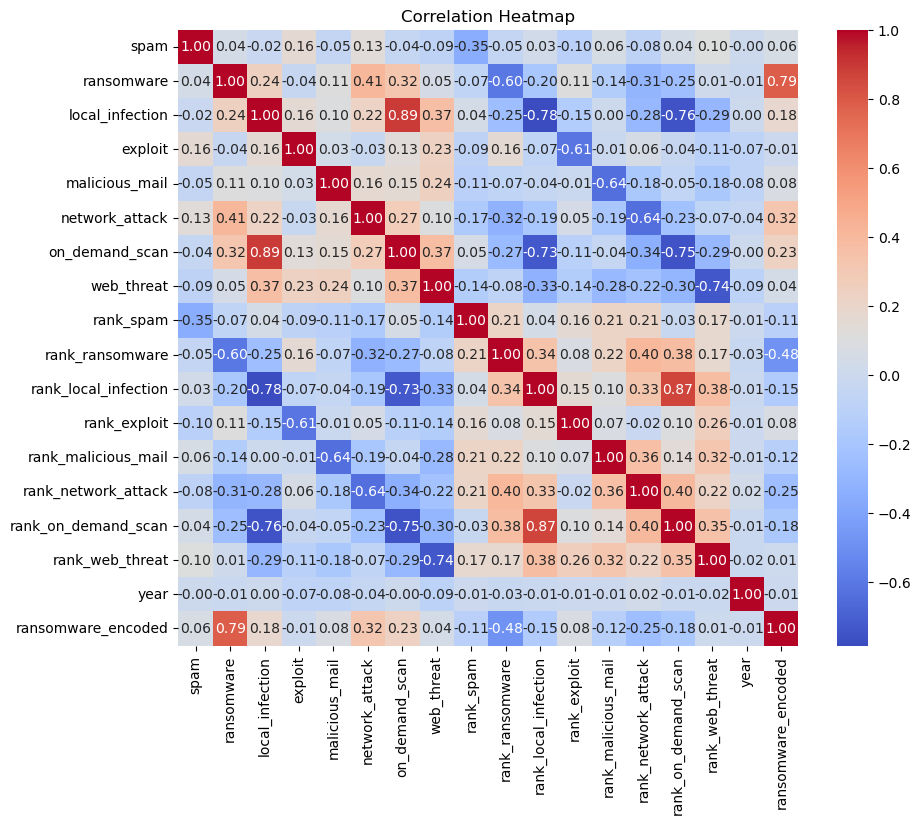

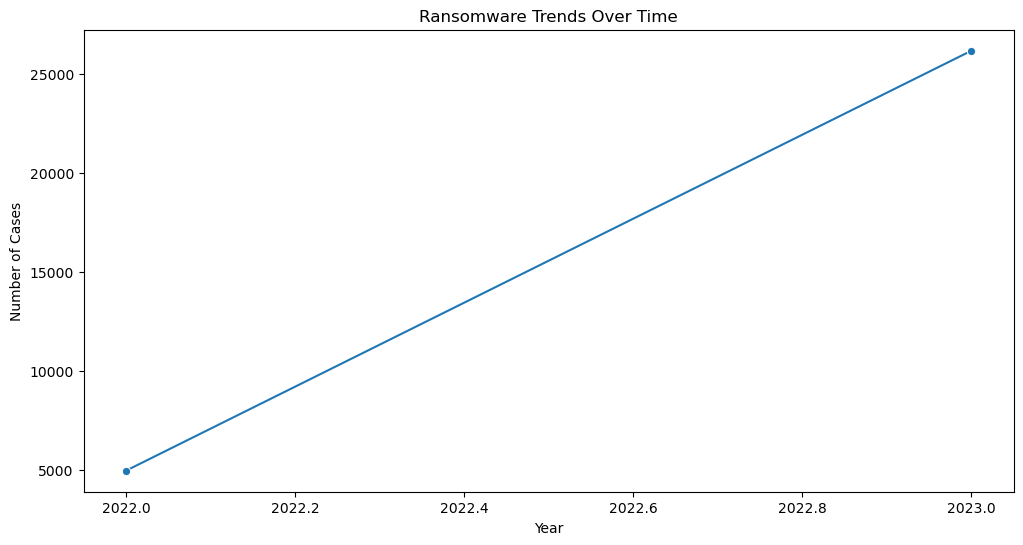

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Input # type: ignore

# Load the processed data
data_path = "/repos/PFDA-project/data/processed_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())

# --- Data Exploration ---
# Overview of the dataset
print("\nData Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Distribution of a chosen feature (e.g., 'ransomware')
if 'ransomware' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='ransomware', order=df['ransomware'].value_counts().index, hue='ransomware', palette='viridis', legend=False)
    plt.title('Distribution of Ransomware Cases')
    plt.xticks(rotation=45)
    plt.show()

# --- Feature Engineering ---
# Feature Engineering: Encode 'ransomware' labels correctly
if 'ransomware' in df.columns:
    ransomware_labels, unique_mapping = pd.factorize(df['ransomware'])
    df['ransomware_encoded'] = ransomware_labels
    num_classes = len(unique_mapping)  # Number of unique categories

# Prepare features and target for machine learning
if 'year' in df.columns and 'ransomware_encoded' in df.columns:
    features = df[['year']]
    target = df['ransomware_encoded']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # --- Neural Network with TensorFlow ---
    # Build a simple neural network
    nn_model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(num_classes, activation='softmax')  # Number of neurons = num_classes
    ])

    nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    nn_model.fit(X_train, y_train, epochs=10, batch_size=32)


    # --- Advanced Visualizations ---
    # Correlation heatmap
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Trends over time (e.g., 'year' and 'ransomware')
    if 'year' in df.columns and 'ransomware' in df.columns:
        crime_trends = df.groupby('year')['ransomware'].count()
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=crime_trends, marker="o")
        plt.title("Ransomware Trends Over Time")
        plt.xlabel("Year")
        plt.ylabel("Number of Cases")
        plt.show()
else:
    print("\nRequired columns for machine learning ('year' and 'ransomware') are missing.")
